Choosing the good hyperparameters of parameters is one of most imprtant procedures, but pretty much annoying and time consuming. As long as you are working on small subsets of hyperparameters, you may find an optimal hyperparameters after a few trials. That is, however, not the case for complex models like neural network. As basic algirhmts to tune them, we can consider grid, random, and Bayesian optimization. 

# Background
Hyperparameter optimization can mostly be considered as black-box optimization. Black-box optimization is defined as the following:

> "Black Box" optimization refers to a problem setup in which an optimization algorithm is supposed to optimize (e.g., minimize) an objective function through a so-called black-box interface: the algorithm may query the value f(x) for a point x, but it does not obtain gradient information, and in particular it cannot make any assumptions on the analytic form of f (e.g., being linear or quadratic). We think of such an objective function as being wrapped in a black-box. The goal of optimization is to find an as good as possible value f(x) within a predefined time, often defined by the number of available queries to the black box. Problems of this type regularly appear in practice, e.g., when optimizing parameters of a model that is either in fact hidden in a black box (e.g., a third party software library) or just too complex to be modeled explicitly.

> by [Balck-Box Optimization Competition homepage](https://bbcomp.ini.rub.de/).

\* There are some hyperparameter optimization methods to make use of gradient information of models, e.g., [paper1](http://proceedings.mlr.press/v37/maclaurin15.pdf).

When optimizing hyperparameters, information available is mostly only score value of defined metrics(e.g., accuracy for classification) with respect each set of hyper parameters. Thus, we query a set of hyperparameters and get a score value as a response. How to make efficient queries depends on which problem you are working on. In this article, we go through the most basic algorithms: grid, random, and Bayesian optimization. Then, we compare their performances on toy problems.
 

### Grid Search
Grid search is the simplest way to search parameters' sapce. Define finite number of points to test on parameter space and then try each of them. For example, if you have the following parameter spaces:


### Random Search
Random search is known effective when trying over high dimensional parater space. For example, neural network may have a lot of hyperparameters


### Bayesian search
This method is relatively new compared to the other two methods. They iterate update and functions.

Let's see in the example.

In [22]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler


data, target = make_classification(n_samples=1000,
                                   n_features=5,
                                   n_redundant=2,
                                   n_classes=2)


def score_func(params):
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
    train_idx, test_idx = list(splitter.split(data, target))[0]
    train_data = data[train_idx]
    train_target = target[train_idx]
    print(params)
    clf = SVC(**params)
    clf.fit(train_data, train_target)
    
    pred = clf.predict(data[test_idx])
    true_y = target[test_idx]
    print(pred)
    print(true_y)
    print("((((((((((((((((((()))))))))))))))))))")
    score = accuracy_score(true_y, pred)
    return score

params_conf = [
    {'name': 'C', 'domain': (1e-3, 1e3), 'type': 'continuous', 'scale': 'log'},
    {'name': 'gamma', 'domain': (1e-3, 1e3), 'type': 'continuous', 'scale': 'log'},
    {'name': 'kernel', 'domain': 'rbf', 'type': 'fixed'}
]

In [23]:
from bboptimizer import Optimizer

opt = Optimizer(score_func, params_conf, sampler="bayes")
opt.search(num_iter=30)



  0%|          | 0/30 [00:00<?, ?it/s]

{'C': 0.005082563931723775, 'gamma': 30.423274180176215, 'kernel': 'rbf'}
[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1]
[1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1
 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1
 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0
 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0]
((((((((((((((((((()))))))))))))))))))
{'C': 0.8930309247049345, 'gamma': 0.42284488995849584, 'kernel': 'rbf'}




 10%|█         | 3/30 [00:00<00:01, 18.04it/s]

{'C': 0.004873651651743134, 'gamma': 31.43393385551098, 'kernel': 'rbf'}
[0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1
 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1
 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0]
[1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1]
((((((((((((((((((()))))))))))))))))))




 13%|█▎        | 4/30 [00:00<00:03,  7.85it/s]

{'C': 0.012146627212876805, 'gamma': 15.386629967763758, 'kernel': 'rbf'}
[1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0
 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1
 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0
 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1]
((((((((((((((((((()))))))))))))))))))




 17%|█▋        | 5/30 [00:00<00:04,  5.62it/s]

{'C': 0.011031613831912254, 'gamma': 16.464918022519836, 'kernel': 'rbf'}
[0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1
 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0
 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1]
[0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0
 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1
 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1
 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0]
((((((((((((((((((()))))))))))))))))))




 20%|██        | 6/30 [00:01<00:05,  4.66it/s]

{'C': 0.019610284296201354, 'gamma': 13.105976746853278, 'kernel': 'rbf'}
[1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1
 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1
 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0
 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1
 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0]
((((((((((((((((((()))))))))))))))))))




 23%|██▎       | 7/30 [00:01<00:05,  4.30it/s]

{'C': 0.005544110981259792, 'gamma': 11.52561685411557, 'kernel': 'rbf'}
[0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1
 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1
 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0
 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1]
[0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1
 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1
 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1
 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1]
((((((((((((((((((()))))))))))))))))))




 27%|██▋       | 8/30 [00:01<00:05,  4.16it/s]

{'C': 0.011516104013153575, 'gamma': 42.34291481910679, 'kernel': 'rbf'}
[0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0
 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
[0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1
 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0
 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1]
((((((((((((((((((()))))))))))))))))))




 30%|███       | 9/30 [00:02<00:05,  3.89it/s]

{'C': 0.00873868534963595, 'gamma': 23.41103172269316, 'kernel': 'rbf'}
[1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1]
[0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0
 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0
 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0
 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1]
((((((((((((((((((()))))))))))))))))))




 33%|███▎      | 10/30 [00:02<00:05,  3.89it/s]

{'C': 0.008695302483735921, 'gamma': 23.7207817973007, 'kernel': 'rbf'}
[1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0
 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0
 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1]
[0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0
 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0
 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1
 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0]
((((((((((((((((((()))))))))))))))))))




 37%|███▋      | 11/30 [00:02<00:04,  3.90it/s]

{'C': 0.00992446493282723, 'gamma': 20.099740828948647, 'kernel': 'rbf'}
[0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1
 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1
 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0]
[0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0
 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0
 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1
 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0
 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0
 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0]
((((((((((((((((((()))))))))))))))))))




 40%|████      | 12/30 [00:03<00:04,  3.88it/s]

{'C': 0.004826773041985984, 'gamma': 41.76502025958621, 'kernel': 'rbf'}
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0
 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1]
[0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1
 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1
 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0
 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1]
((((((((((((((((((()))))))))))))))))))




 43%|████▎     | 13/30 [00:03<00:04,  3.75it/s]

{'C': 0.0026076813026868805, 'gamma': 115.94998146773601, 'kernel': 'rbf'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0
 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1
 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0]
((((((((((((((((((()))))))))))))))))))




 47%|████▋     | 14/30 [00:03<00:04,  3.66it/s]

{'C': 0.001810472767918667, 'gamma': 203.22250598150035, 'kernel': 'rbf'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0
 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1
 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1
 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0]
((((((((((((((((((()))))))))))))))))))




 50%|█████     | 15/30 [00:04<00:04,  3.67it/s]

{'C': 0.0018229187174639682, 'gamma': 200.46268253107286, 'kernel': 'rbf'}
[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0
 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0
 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1
 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0]
((((((((((((((((((()))))))))))))))))))




 53%|█████▎    | 16/30 [00:04<00:03,  3.66it/s]

{'C': 0.001947432495728029, 'gamma': 182.98232839030095, 'kernel': 'rbf'}
[0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1
 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1
 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1
 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0]
((((((((((((((((((()))))))))))))))))))




 57%|█████▋    | 17/30 [00:04<00:03,  3.64it/s]

{'C': 0.001920023995700237, 'gamma': 183.42658154775336, 'kernel': 'rbf'}
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0
 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0
 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1
 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1]
((((((((((((((((((()))))))))))))))))))




 60%|██████    | 18/30 [00:04<00:03,  3.60it/s]

{'C': 0.001915188728863238, 'gamma': 184.3372630663918, 'kernel': 'rbf'}
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1
 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0
 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1]
((((((((((((((((((()))))))))))))))))))




 63%|██████▎   | 19/30 [00:05<00:03,  3.57it/s]

{'C': 0.0019585309692415308, 'gamma': 186.17857645987334, 'kernel': 'rbf'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0
 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1
 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1
 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1]
((((((((((((((((((()))))))))))))))))))




 67%|██████▋   | 20/30 [00:05<00:02,  3.56it/s]

{'C': 0.002163109609060013, 'gamma': 202.9807885632102, 'kernel': 'rbf'}
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0
 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1]
((((((((((((((((((()))))))))))))))))))




 70%|███████   | 21/30 [00:05<00:02,  3.56it/s]

{'C': 0.0020510346378665332, 'gamma': 194.89298320537773, 'kernel': 'rbf'}
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
[0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0
 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0
 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0]
((((((((((((((((((()))))))))))))))))))




 73%|███████▎  | 22/30 [00:06<00:02,  3.56it/s]

{'C': 0.0018177028289805355, 'gamma': 179.31259476430233, 'kernel': 'rbf'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1]
[1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1
 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1]
((((((((((((((((((()))))))))))))))))))




 77%|███████▋  | 23/30 [00:06<00:01,  3.56it/s]

{'C': 0.0025243231591887327, 'gamma': 232.7366738210827, 'kernel': 'rbf'}
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0
 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0
 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1
 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1]
((((((((((((((((((()))))))))))))))))))




 80%|████████  | 24/30 [00:06<00:01,  3.56it/s]

{'C': 0.0022783105533399615, 'gamma': 203.59522405527116, 'kernel': 'rbf'}
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1
 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0
 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1
 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1
 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0]
((((((((((((((((((()))))))))))))))))))




 83%|████████▎ | 25/30 [00:07<00:01,  3.50it/s]

{'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}
[0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1
 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1
 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0
 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0
 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1
 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0
 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1
 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0]
((((((((((((((((((()))))))))))))))))))




 87%|████████▋ | 26/30 [00:07<00:01,  3.49it/s]

{'C': 0.0023081685708668457, 'gamma': 203.72279819562078, 'kernel': 'rbf'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1
 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0
 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0
 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0
 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1]
((((((((((((((((((()))))))))))))))))))




 90%|█████████ | 27/30 [00:07<00:00,  3.49it/s]

{'C': 0.0024710330331891447, 'gamma': 210.96623498974225, 'kernel': 'rbf'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0
 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1
 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1
 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0]
((((((((((((((((((()))))))))))))))))))




 93%|█████████▎| 28/30 [00:08<00:00,  3.49it/s]

{'C': 0.0025464772257148363, 'gamma': 215.47348925246462, 'kernel': 'rbf'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0
 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0]
((((((((((((((((((()))))))))))))))))))




 97%|█████████▋| 29/30 [00:08<00:00,  3.44it/s]

{'C': 0.0026022871694863703, 'gamma': 219.64766486986204, 'kernel': 'rbf'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0
 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0
 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0]
((((((((((((((((((()))))))))))))))))))




100%|██████████| 30/30 [00:08<00:00,  3.42it/s]



({'C': 0.0019585309692415308, 'gamma': 186.17857645987334, 'kernel': 'rbf'},
 0.485)

In [13]:
clf.predict(data)

array([1, 0, 1, ..., 0, 0, 0])

In [17]:
from sklearn.metrics import roc_auc_score
pred = clf.predict_proba(data)[:, 1]
roc_auc_score(target, pred)

0.9999993599983616

In [18]:
pred

array([9.99999989e-01, 1.61739441e-04, 9.99999981e-01, ...,
       1.61092903e-04, 1.61200985e-04, 1.61741313e-04])

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit


def score_func(params):
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
    train_idx, test_idx = list(splitter.split(data, target))[0]
    train_data = data[train_idx]
    train_target = target[train_idx]
    clf = SVC(probability=True, **params)
    clf.fit(train_data, train_target)
    
    pred = clf.predict_proba(data[test_idx])[:, 1]
    true_y = target[test_idx]
    score = roc_auc_score(true_y, pred)
    return score

In [1]:
import tensorflow as tf


mnist = tf.contrib.learn.datasets.load_dataset("mnist")

/home/tom/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [2]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np


train = mnist.train
X = train.images
train_X = X
train_y = np.expand_dims(train.labels, -1)
train_y = OneHotEncoder().fit_transform(train_y)

valid = mnist.validation
X = valid.images
valid_X = X 
valid_y = np.expand_dims(valid.labels, -1)
valid_y = OneHotEncoder().fit_transform(valid_y)

test = mnist.test
X = test.images
test_X = X
test_y = test.labels

For the sake of the simplicity, we are going to use the following six parameters:

- the number of layers
- the number of hidden units
- learning rate
- weight regularizer
- optimization algorithm

In [3]:
from bboptimizer import Optimizer
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.layers import Activation, Reshape
from keras.optimizers import Adam, Adadelta, SGD, RMSprop
from keras.regularizers import l1, l2


def get_optimzier(name, **kwargs):
    if name == "rmsprop":
        return RMSprop(**kwargs)
    elif name == "adam":
        return Adam(**kwargs)
    elif name == "sgd":
        return SGD(**kwargs)
    elif name == "adadelta":
        return Adadelta(**kwargs)
    else:
        raise ValueError(name)


def construct_NN(params):
    model = Sequential()
    model.add(Reshape((784,), input_shape=(784,)))
    
    def update_model(_model, _params, name):
        _model.add(Dropout(_params[name + "_drop_rate"]))
        _model.add(Dense(units=_params[name + "_num_units"],
                    activation=None,
                    kernel_regularizer=l2(_params[name + "_w_reg"])))
        if _params[name + "_is_batch"]:
            _model.add(BatchNormalization())
        if _params[name + "_activation"] is not None:
            _model.add(Activation(_params[name + "_activation"]))
        return _model
    
    # Add input layer    
    model = update_model(model, params, "input")
    # Add hidden layer
    for i in range(params["num_hidden_layers"]):
        model = update_model(model, params, "hidden")
    # Add output layer
    model = update_model(model, params, "output")
    optimizer = get_optimzier(params["optimizer"],
                              lr=params["learning_rate"])
    model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model
        

def score_func(params):
    print("parameters", params)
    model = construct_NN(params)
    model.fit(train_X[:100], train_y[:100],
              epochs=params["epochs"],
              batch_size=params["batch_size"], verbose=1)
    print("###################", model.metrics_names)
    score = model.evaluate(valid_X, valid_y,
                  batch_size=params["batch_size"])
    idx = model.metrics_names.index("acc")
    score = score[idx]
    return score

params_conf = [
    {"name": "num_hidden_layers", "type": "integer",
     "domain": (0, 5)},
    {"name": "batch_size", "type": "integer",
     "domain": (16, 128), "scale": "log"},
    {"name": "learning_rate", "type": "continuous",
     "domain": (1e-5, 1e-1), "scale": "log"},
    {"name": "epochs", "type": "fixed",
     "domain": 1, "scale": "log"},
    {"name": "optimizer", "type": "categorical",
     "domain": ("rmsprop", "sgd", "adam", "adadelta")},
    
    {"name": "input_drop_rate", "type": "continuous",
     "domain": (0, 0.5)},
    {"name": "input_num_units", "type": "integer",
     "domain": (32, 256), "scale": "log"},
    {"name": "input_w_reg", "type": "continuous",
     "domain": (1e-10, 1e-1), "scale": "log"},
    {"name": "input_is_batch", "type": "categorical",
     "domain": (True, False)},
    {"name": "input_activation", "type": "categorical",
     "domain": ("relu", "sigmoid", "tanh")},
    
    {"name": "hidden_drop_rate", "type": "continuous",
     "domain": (0, 0.75)},
    {"name": "hidden_num_units", "type": "integer",
     "domain": (32, 256), "scale": "log"},
    {"name": "hidden_w_reg", "type": "continuous",
     "domain": (1e-10, 1e-1), "scale": "log"},
    {"name": "hidden_is_batch", "type": "categorical",
     "domain": (True, False)},
    {"name": "hidden_activation", "type": "categorical",
     "domain": ("relu", "sigmoid", "tanh")},
    
    {"name": "output_drop_rate", "type": "continuous",
     "domain": (0, 0.5)},
    {"name": "output_num_units", "type": "fixed",
     "domain": 10},
    {"name": "output_w_reg", "type": "continuous",
     "domain": (1e-10, 1e-1), "scale": "log"},
    {"name": "output_is_batch", "type": "categorical",
     "domain": (True, False)},
    {"name": "output_activation", "type": "fixed",
     "domain": "softmax"},
    
]

Using TensorFlow backend.


In [4]:
opt = Optimizer(score_func, params_conf, sampler="bayes", r_min=3)
opt.search(num_iter=30)

parameters {'num_hidden_layers': 0, 'batch_size': 118, 'learning_rate': 1.5555905588340013e-05, 'optimizer': 'adam', 'input_drop_rate': 0.153802551999555, 'input_num_units': 129, 'input_w_reg': 3.128990014405261e-05, 'input_is_batch': False, 'input_activation': 'sigmoid', 'hidden_drop_rate': 0.7226545083325048, 'hidden_num_units': 114, 'hidden_w_reg': 2.3104180434424823e-08, 'hidden_is_batch': False, 'hidden_activation': 'sigmoid', 'output_drop_rate': 0.3910100818079771, 'output_w_reg': 0.0001316728664817837, 'output_is_batch': True, 'epochs': 1, 'output_num_units': 10, 'output_activation': 'softmax'}
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 2.8936 - acc: 0.0200
################### ['loss', 'acc']
5000/5000 [==============================] - 0s 19us/step
parameters {'num_hidden_layers': 5, 'batch_size': 100, 'learning_rate': 0.00028203365888503144, 'optimizer': 'sgd', 'input_drop_rate': 0.009856716873734683, 'input_num_units': 55, 'input_w_reg': 3.646870

Epoch 1/1
100/100 [==============================] - 1s 7ms/step - loss: 2.8045 - acc: 0.0700
################### ['loss', 'acc']
5000/5000 [==============================] - 0s 52us/step
parameters {'num_hidden_layers': 2, 'batch_size': 65, 'learning_rate': 4.1815599488297076e-05, 'optimizer': 'sgd', 'input_drop_rate': 0.5, 'input_num_units': 119, 'input_w_reg': 8.12759825075927e-06, 'input_is_batch': False, 'input_activation': 'tanh', 'hidden_drop_rate': 0.0969885527495958, 'hidden_num_units': 38, 'hidden_w_reg': 0.05305715576944579, 'hidden_is_batch': False, 'hidden_activation': 'relu', 'output_drop_rate': 0.0, 'output_w_reg': 0.1, 'output_is_batch': False, 'epochs': 1, 'output_num_units': 10, 'output_activation': 'softmax'}
Epoch 1/1
100/100 [==============================] - 0s 1ms/step - loss: 8.9776 - acc: 0.1000
################### ['loss', 'acc']
5000/5000 [==============================] - 0s 22us/step
parameters {'num_hidden_layers': 2, 'batch_size': 16, 'learning_rate': 0.1

5000/5000 [==============================] - 0s 63us/step
parameters {'num_hidden_layers': 5, 'batch_size': 48, 'learning_rate': 0.1, 'optimizer': 'adadelta', 'input_drop_rate': 0.0, 'input_num_units': 256, 'input_w_reg': 1.077613819934102e-08, 'input_is_batch': True, 'input_activation': 'tanh', 'hidden_drop_rate': 0.7499981613380879, 'hidden_num_units': 256, 'hidden_w_reg': 1.1478317914240908e-05, 'hidden_is_batch': True, 'hidden_activation': 'relu', 'output_drop_rate': 0.4986696593467893, 'output_w_reg': 0.018333777267886403, 'output_is_batch': True, 'epochs': 1, 'output_num_units': 10, 'output_activation': 'softmax'}
Epoch 1/1
100/100 [==============================] - 1s 8ms/step - loss: 3.2310 - acc: 0.0900
################### ['loss', 'acc']
5000/5000 [==============================] - 0s 89us/step
parameters {'num_hidden_layers': 5, 'batch_size': 55, 'learning_rate': 0.1, 'optimizer': 'adadelta', 'input_drop_rate': 0.0, 'input_num_units': 256, 'input_w_reg': 5.8146840537603275e-

({'batch_size': 100,
  'epochs': 1,
  'hidden_activation': 'tanh',
  'hidden_drop_rate': 0.6763497487350826,
  'hidden_is_batch': True,
  'hidden_num_units': 216,
  'hidden_w_reg': 2.9891633726584893e-05,
  'input_activation': 'relu',
  'input_drop_rate': 0.0,
  'input_is_batch': True,
  'input_num_units': 55,
  'input_w_reg': 9.274445414560197e-07,
  'learning_rate': 0.00018770247506846974,
  'num_hidden_layers': 5,
  'optimizer': 'sgd',
  'output_activation': 'softmax',
  'output_drop_rate': 0.2930217188773544,
  'output_is_batch': True,
  'output_num_units': 10,
  'output_w_reg': 1.157439857148625e-08},
 0.050799999721348285)

In [1]:
from bboptimizer.samplers.utils import SAMPLERS_MAP
SAMPLERS_MAP

{'bayes': bboptimizer.samplers.bayes.BayesSampler,
 'grid': bboptimizer.samplers.grid.GridSampler,
 'random': bboptimizer.samplers.random.RandomSampler}

In [6]:
opt.optimizer.

AttributeError: 'BayesOptimizer' object has no attribute 'optimizert'

In [13]:
%pylab inline
import GPy
import GPyOpt
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [49]:
def myf(x):
    print(x)
    return sum((2*x)**2)

bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)},
         {'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)}]

# bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)}]

In [50]:
max_iter = 15
opt = GPyOpt.methods.BayesianOptimization(myf,bounds)
opt.run_optimization(max_iter, verbosity=True)

[[ 0.83472294 -0.35045541]]
[[-0.81677674 -0.20893279]]
[[0.56892437 0.98436479]]
[[-0.70499574  0.15934302]]
[[ 0.36236546 -0.37212878]]
[[ 0.3276707 -0.3794702]]
[[ 0.19993882 -0.76537162]]
[[ 0.16673283 -0.17536047]]
[[-2.46435936e-02 -7.75201312e-05]]
[[-1.  1.]]
[[0.05523789 0.08312356]]
[[-0.0745971  0.0846349]]
[[-0.13251386 -0.12509652]]
[[-0.0692017   0.49375632]]
[[-0.99652227 -0.99553451]]
[[-0.28496292 -0.90985205]]
[[0.12828897 0.05891816]]
[[0.47730358 0.37926197]]
[[-0.58558844 -0.02097188]]
[[-0.67679943  0.899019  ]]


In [38]:
print(opt.X)
print(opt.x_opt)

[[ 9.87769699e-01 -5.22068678e-01]
 [-2.60640122e-01 -5.92168000e-01]
 [ 3.62671315e-01  3.08434924e-01]
 [ 4.23333810e-01 -5.07602750e-01]
 [ 6.87402157e-01  2.10656733e-01]
 [ 3.12278334e-01  1.83631054e-01]
 [ 8.31197264e-04  5.77286352e-02]
 [-1.00000000e+00  9.75483572e-01]
 [ 6.73192012e-02 -9.58554176e-02]
 [-1.00000000e+00 -1.00000000e+00]
 [-6.75609333e-02 -3.06036996e-02]
 [ 1.39019074e-02 -7.44473136e-04]
 [-9.62346335e-01 -2.63916597e-02]
 [ 9.52792460e-01  9.90318356e-01]
 [ 3.20600327e-01 -3.70925950e-01]
 [ 8.19614846e-01 -5.49740227e-01]
 [ 1.98597971e-02 -4.48193390e-01]
 [ 8.05345803e-01  7.37027584e-01]
 [-4.62028321e-01  4.55104405e-01]
 [-7.58883852e-01  1.00326861e-02]]
[ 0.01390191 -0.00074447]


In [56]:
opt.Y - np.sum((2 * opt.X) ** 2, axis=-1, keepdims=True)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [55]:
opt.X.shape

(20, 2)

In [29]:
opt.Y_best

array([6.61410245e-01, 7.33240385e-02, 7.33240385e-02, 7.33240385e-02,
       7.33240385e-02, 4.15628331e-04, 4.15628331e-04, 4.15628331e-04,
       4.15628331e-04, 4.15628331e-04, 4.15628331e-04, 4.15628331e-04,
       4.15628331e-04, 4.15628331e-04, 4.15628331e-04, 4.15628331e-04,
       4.15628331e-04, 4.15628331e-04, 4.15628331e-04, 4.15628331e-04])

In [35]:
if [3]:
    print("hey")

hey


In [19]:
import numpy as np
np.array(None)

array(None, dtype=object)

In [14]:
x.get('scale', None)

'log'

In [6]:
import math
math.log10(2)

0.3010299956639812

In [5]:
1e-5

1e-05

In [1]:
from hedgeable_ai.optimizer.tuner import RandomOptimizer


mixed_domain =[{'name': 'var1', 'type': 'continuous', 'domain': (-5,5),'dimensionality': 3},
               {'name': 'var3', 'type': 'discrete', 'domain': (3,8,10),'dimensionality': 2},
               {'name': 'var4', 'type': 'categorical', 'domain': ('hey', 'what up', 'oops'),'dimensionality': 1},
               {'name': 'var5', 'type': 'integer', 'domain': (1, 10), 'scale':'log'}]

opt = RandomOptimizer(score_func=lambda x: x, params_conf=mixed_domain)

/home/tom/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


{'name': 'var1', 'type': 'continuous', 'domain': (-5, 5), 'dimensionality': 3}
3
{'name': 'var3', 'type': 'discrete', 'domain': (3, 8, 10), 'dimensionality': 2}
2
{'name': 'var4', 'type': 'categorical', 'domain': ('hey', 'what up', 'oops'), 'dimensionality': 1}
1
{'name': 'var5', 'type': 'integer', 'domain': (1, 10), 'scale': 'log'}
1


In [2]:
x = [0., 0., 0., 8., 1., 1., 0., 0., 1.]
param = opt.vec2params(x)

[0.0, 0.0, 0.0, 8, 3, 'hey', 10]


In [3]:
param

{'var1_1': 0.0,
 'var1_2': 0.0,
 'var1_3': 0.0,
 'var3_1': 8,
 'var3_2': 3,
 'var4_1': 'hey',
 'var5': 10}

In [4]:
opt.params2vec(param)

array([0., 0., 0., 8., 3., 1., 0., 0., 1.])

In [5]:
opt.design_space.dimensionality

7

In [6]:
opt.design_space.model_dimensionality

9

In [1]:
conf = dict()
conf.get("hey", False)

False

In [1]:
from bboptimizer.samplers import RandomSampler, GridSampler

params_conf = [
    {"name": "num_hidden_layers", "type": "integer",
     "domain": (0, 5)},
    {"name": "batch_size", "type": "integer",
     "domain": (16, 128), "scale": "log"},
    {"name": "learning_rate", "type": "continuous",
     "domain": (1e-5, 1e-1), "scale": "log"},
    {"name": "epochs", "type": "fixed",
     "domain": 1, "scale": "log"},
    {"name": "optimizer", "type": "categorical",
     "domain": ("rmsprop", "sgd", "adam", "adadelta")},
    
    {"name": "input_drop_rate", "type": "continuous",
     "domain": (0, 0.5)},
    {"name": "input_num_units", "type": "integer",
     "domain": (32, 256), "scale": "log"},
    {"name": "input_w_reg", "type": "continuous",
     "domain": (1e-10, 1e-1), "scale": "log"},
    {"name": "input_is_batch", "type": "categorical",
     "domain": (True, False)},
    {"name": "input_activation", "type": "categorical",
     "domain": ("relu", "sigmoid", "tanh")},
    
    {"name": "hidden_drop_rate", "type": "continuous",
     "domain": (0, 0.75)},
    {"name": "hidden_num_units", "type": "integer",
     "domain": (32, 256), "scale": "log"},
    {"name": "hidden_w_reg", "type": "continuous",
     "domain": (1e-10, 1e-1), "scale": "log"},
    {"name": "hidden_is_batch", "type": "categorical",
     "domain": (True, False)},
    {"name": "hidden_activation", "type": "categorical",
     "domain": ("relu", "sigmoid", "tanh")},
    
    {"name": "output_drop_rate", "type": "continuous",
     "domain": (0, 0.5)},
    {"name": "output_num_units", "type": "fixed",
     "domain": 10},
    {"name": "output_w_reg", "type": "continuous",
     "domain": (1e-10, 1e-1), "scale": "log"},
    {"name": "output_is_batch", "type": "categorical",
     "domain": (True, False)},
    {"name": "output_activation", "type": "fixed",
     "domain": "softmax"},
    
]
sampler = RandomSampler(params_conf)
sampler = GridSampler(params_conf)

In [2]:
sampler.sample(1000)

[{'batch_size': 16,
  'epochs': 1,
  'hidden_activation': 'relu',
  'hidden_drop_rate': 0,
  'hidden_is_batch': True,
  'hidden_num_units': 32,
  'hidden_w_reg': 1e-10,
  'input_activation': 'relu',
  'input_drop_rate': 0,
  'input_is_batch': True,
  'input_num_units': 32,
  'input_w_reg': 1e-10,
  'learning_rate': 1e-05,
  'num_hidden_layers': 0,
  'optimizer': 'rmsprop',
  'output_activation': 'softmax',
  'output_drop_rate': 0,
  'output_is_batch': True,
  'output_num_units': 10,
  'output_w_reg': 1e-10},
 {'batch_size': 16,
  'epochs': 1,
  'hidden_activation': 'relu',
  'hidden_drop_rate': 0,
  'hidden_is_batch': True,
  'hidden_num_units': 32,
  'hidden_w_reg': 1e-10,
  'input_activation': 'relu',
  'input_drop_rate': 0,
  'input_is_batch': True,
  'input_num_units': 32,
  'input_w_reg': 1e-10,
  'learning_rate': 1e-05,
  'num_hidden_layers': 0,
  'optimizer': 'rmsprop',
  'output_activation': 'softmax',
  'output_drop_rate': 0,
  'output_is_batch': False,
  'output_num_units': 1

In [47]:
sampler.design_space.get_bounds()def _update(self, new_X, new_y):
        raise NotImplementedError()

[(0, 5),
 (1.2041199826559248, 2.1072099696478683),
 (-5.0, -1.0),
 1,
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0, 0.5),
 (1.505149978319906, 2.4082399653118496),
 (-10.0, -1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0, 0.75),
 (1.505149978319906, 2.4082399653118496),
 (-10.0, -1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0, 0.5),
 10,
 (-10.0, -1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 'softmax']

In [18]:
import GPy

kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

In [19]:
import numpy as np

X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05

In [48]:
m = GPy.models.GPRegression([],[], kernel)

AttributeError: 'list' object has no attribute 'ndim'

In [12]:
m.optimize()

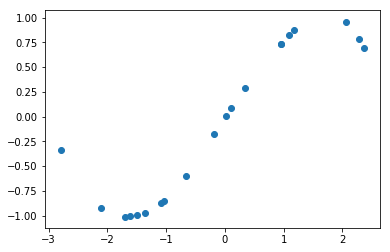

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X, m.predict(X)[0])

 /home/tom/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


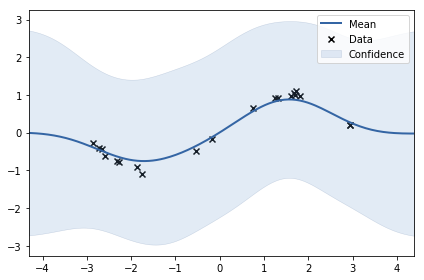

In [21]:
m.plot()

In [22]:
m.optimize()

 /home/tom/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


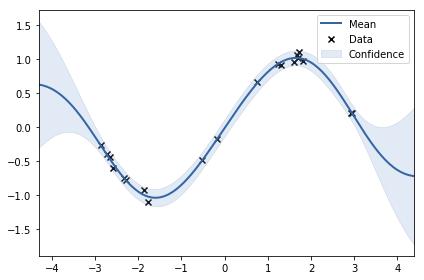

In [23]:
m.plot()

In [45]:
mu, var = m.predict(X[0])

AssertionError: need at least column vectors as inputs to kernels for now, given X2.shape=(1,)

In [46]:
X[0]

array([-2.64953963])

In [42]:
mu[idx] = 1e-2

In [43]:
mu

array([[0.01      ],
       [0.01      ],
       [0.93153356],
       [1.00190278],
       [0.95576666],
       [1.01372503],
       [1.01406936],
       [0.01      ],
       [0.01      ],
       [1.01161006],
       [0.6489535 ],
       [0.01      ],
       [0.01      ],
       [0.01      ],
       [0.2150561 ],
       [0.22010886],
       [0.01      ],
       [1.01455512],
       [0.01      ],
       [0.01      ]])

In [30]:
min_f(mu)

TypeError: '>' not supported between instances of 'float' and 'vectorize'

In [51]:
np.var(np.random.randn(1))

0.0